# ESCUELA POLITECNICA NACIONAL
- Nombre: Freddy Jimenez
- Curso: Gr1cc
- Fecha: 08/01/2025

## REPOSITORIO. -

Link: https://github.com/freddy1604/RepositorioDeMetodosNumericos/tree/main/%5BTarea%2009%5D%20Ejercicios%20Unidad%2004-A-B%2C%20Eliminaci%C3%B3n%20gaussiana%20vs%20Gauss-Jordan

# [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan

Resuelva los ejercicios adjuntos.

Indicaciones. -
- Puede realizar los cálculos a mano, o utilizar cualquier librería o implementar su propia función. 
- En caso de usar código, subir la resolución de los ejercicios en un repositorio público en Github e incluir enlace de su repositorio.  
- Subir archivo pdf.

## CONJUNTO DE EJERCICIOS. -

### 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.

![](imagen1.png)

Sistema a: [ 0. -0.]


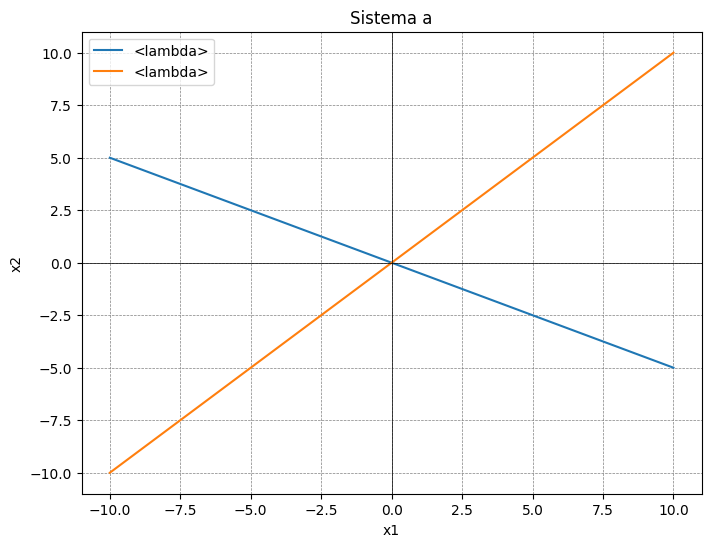

Sistema b: No tiene solución o tiene infinitas soluciones


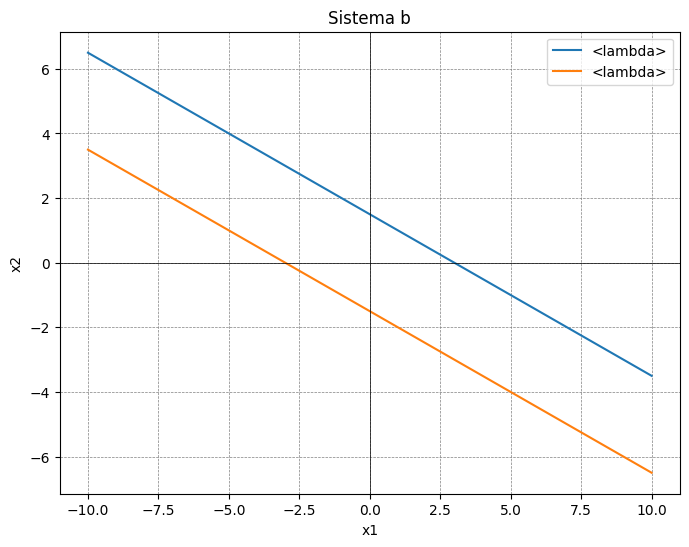

Sistema c: No es posible representarlo gráficamente
Sistema d: No tiene solución o tiene infinitas soluciones


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def solve_and_plot_system(title, equations, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)

    plt.figure(figsize=(8, 6))
    for eq in equations:
        plt.plot(x, eq(x), label=f"{eq.__name__}")

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()

def solve_linear_system(coefficients, constants):

    A = np.array(coefficients)
    b = np.array(constants)
    try:
        solution = np.linalg.solve(A, b)
        return solution
    except np.linalg.LinAlgError:
        return "No tiene solución o tiene infinitas soluciones"

# Definición de los sistemas
def main():
    # Sistema a
    coefficients_a = [[1, 2], [1, -1]]
    constants_a = [0, 0]
    solution_a = solve_linear_system(coefficients_a, constants_a)
    print("Sistema a:", solution_a)

    solve_and_plot_system(
        "Sistema a",
        [lambda x: -0.5 * x, lambda x: x],
        [-10, 10]
    )

    # Sistema b
    coefficients_b = [[1, 2], [-2, -4]]
    constants_b = [3, 6]
    solution_b = solve_linear_system(coefficients_b, constants_b)
    print("Sistema b:", solution_b)

    solve_and_plot_system(
        "Sistema b",
        [lambda x: 1.5 - 0.5 * x, lambda x: -1.5 - 0.5 * x],
        [-10, 10]
    )
    # Sistema c
    coefficients_c = [[2, 1], [1, 1], [1, -3]]
    constants_c = [-1, 2, 5]
    print("Sistema c: No es posible representarlo gráficamente")

    # Sistema d
    coefficients_d = [[2, 1, 1], [2, 4, -1]]
    constants_d = [1, -1]
    solution_d = solve_linear_system(coefficients_d, constants_d)
    print("Sistema d:", solution_d)

if __name__ == "__main__":
    main()

### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $x_1=-1$, $x_2=2$, $x_3=3$.)

![](imagen2.png)

In [7]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(b)
    A = np.hstack((A, b.reshape(-1, 1)))  # Matriz aumentada

    # Eliminación hacia adelante
    for i in range(n):
        for j in range(i + 1, n):
            factor = round(A[j, i] / A[i, i], 2)
            A[j, i:] -= factor * A[i, i:]
            A[j, i:] = np.round(A[j, i:], 2)  # Redondeo a 2 dígitos

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = round((A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i], 2)

    return x

def main():
    # Sistema a
    A_a = np.array([
        [-1, 4, 1],
        [5/3, 1/3, 2/3],
        [2, 1, 4]
    ])
    b_a = np.array([8, 1, 11])

    solution_a = gaussian_elimination(A_a, b_a)
    print("Solución del sistema a:", solution_a)

    # Sistema b
    A_b = np.array([
        [4, 2, -1],
        [1/9, 1/9, -1/3],
        [1, 4, 2]
    ])
    b_b = np.array([-5, -1, 9])

    solution_b = gaussian_elimination(A_b, b_b)
    print("Solución del sistema b:", solution_b)

if __name__ == "__main__":
    main()

Solución del sistema a: [-0.77  1.09  2.87]
Solución del sistema b: [-1.  1.  3.]


### 3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

![](imagen3.png)

In [6]:
import numpy as np

def gaussian_elimination_with_pivoting(A, b):

    n = len(b)
    A = A.astype(float)  # Asegurarse de que la matriz sea de tipo float
    b = b.astype(float)
    A = np.hstack((A, b.reshape(-1, 1)))  # Matriz aumentada
    swaps = []

    # Eliminación hacia adelante con pivoteo parcial
    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            swaps.append(f"Intercambio de fila {i} con fila {max_row}")

        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i]

    return x, swaps

def main():
    # Sistema a
    A_a = np.array([
        [1, -1, 3],
        [3, -3, 1],
        [1, 1, 0]
    ])
    b_a = np.array([2, -1, 3])

    solution_a, swaps_a = gaussian_elimination_with_pivoting(A_a, b_a)
    print("Sistema a:")
    print("Solución:", solution_a)
    print("Intercambios:", swaps_a)

    # Sistema b
    A_b = np.array([
        [2, -1.5, 3],
        [-1, 0, 2],
        [4, -4.5, 5]
    ])
    b_b = np.array([1, 3, 1])

    solution_b, swaps_b = gaussian_elimination_with_pivoting(A_b, b_b)
    print("\nSistema b:")
    print("Solución:", solution_b)
    print("Intercambios:", swaps_b)

    # Sistema c
    A_c = np.array([
        [2, 0, 0, 0],
        [1, 1.5, 0, 0],
        [-3, 0, 0.5, 0],
        [2, -2, 1, 1]
    ])
    b_c = np.array([3, 4.5, -6.6, 0.8])

    solution_c, swaps_c = gaussian_elimination_with_pivoting(A_c, b_c)
    print("\nSistema c:")
    print("Solución:", solution_c)
    print("Intercambios:", swaps_c)

    # Sistema d
    A_d = np.array([
        [1, 1, 0, 1],
        [2, 1, -1, 1],
        [4, -2, -2, 2],
        [3, -1, -1, 2]
    ])
    b_d = np.array([2, 1, 0, -3])

    solution_d, swaps_d = gaussian_elimination_with_pivoting(A_d, b_d)
    print("\nSistema d:")
    print("Solución:", solution_d)
    print("Intercambios:", swaps_d)

if __name__ == "__main__":
    main()

Sistema a:
Solución: [1.1875 1.8125 0.875 ]
Intercambios: ['Intercambio de fila 0 con fila 1', 'Intercambio de fila 1 con fila 2']

Sistema b:
Solución: [-1. -0.  1.]
Intercambios: ['Intercambio de fila 0 con fila 2']

Sistema c:
Solución: [ 1.5  2.  -4.2  6. ]
Intercambios: ['Intercambio de fila 0 con fila 2', 'Intercambio de fila 1 con fila 3', 'Intercambio de fila 2 con fila 3']

Sistema d:
Solución: [ nan  nan  inf -inf]
Intercambios: ['Intercambio de fila 0 con fila 2']


C:\Users\fredd\AppData\Local\Temp\ipykernel_3264\1021615766.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  x[i] = (A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i]


### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

![](imagen4.png)

In [17]:
import numpy as np

def gaussian_elimination(matrix, vector):
    # Convertir a matrices de precisión simple (32 bits)
    A = np.array(matrix, dtype=np.float32)
    b = np.array(vector, dtype=np.float32)

    n = len(b)

    # Eliminación hacia adelante
    for i in range(n):
        # Hacer el pivoteo parcial si es necesario
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]

        # Normalizar la fila pivote
        pivot = A[i, i]
        if np.isclose(pivot, 0):
            raise ValueError("El sistema no tiene solución única.")

        A[i] = A[i] / pivot
        b[i] = b[i] / pivot

        # Eliminar las entradas debajo del pivote
        for j in range(i + 1, n):
            factor = A[j, i]
            A[j] -= factor * A[i]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros_like(b)
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - np.dot(A[i, i + 1:], x[i + 1:])

    return x

# Ejemplo de sistemas de la imagen
systems = [
    {"matrix": [[1/4, 1/5, 1/6], [1/3, 1/4, 1/5], [1/2, 1, 2]], "vector": [9, 8, 8]},
    {"matrix": [[3.333, 15920, -10.333], [2.222, 16.71, 9.612], [1.5611, 5.1791, 1.6852]], "vector": [15913, 28.544, 8.4254]},
    {"matrix": [[1, 1/2, 1/3, 1/4], [1/2, 1/3, 1/4, 1/5], [1/3, 1/4, 1/5, 1/6], [1/4, 1/5, 1/6, 1/7]], "vector": [1/5, 1/6, 1/7, 1/9]},
    {"matrix": [[2, 1, -1, -3, -3], [1, 0, 2, -1, -4], [-2, 0, -3, 4, -5], [3, 1, 2, -4, 5], [1, -1, -3, -4, -1]], "vector": [7, 2, -5, 6, -3]}
]

# Resolver cada sistema
for idx, system in enumerate(systems):
    print(f"\nSistema {chr(97 + idx)}:")
    try:
        solution = gaussian_elimination(system["matrix"], system["vector"])
        print("Solución:", solution)
    except ValueError as e:
        print(e)


Sistema a:
Solución: [-227.07697  476.92322 -177.69237]

Sistema b:
Solución: [1.        1.0000001 1.0001063]

Sistema c:
Solución: [  1.9301407 -23.04749    57.04739   -36.88877  ]

Sistema d:
Solución: [-5.5384626   7.846154    1.3076924  -3.48718    -0.35897443]


### 5. Dado el sistema lineal:

![](imagen5.png)

- a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.
- b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.
- c. Suponga que existe una única solución para una a determinada, encuentre la solución.

In [16]:
import numpy as np

def analyze_system(alpha):
    # Definimos el sistema en función de α
    matrix = [
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ]
    vector = [-2, 3, 2]

    # Convertir a matrices numpy
    matrix = np.array(matrix, dtype=float)
    vector = np.array(vector, dtype=float)

    # Verificar el determinante de la matriz de coeficientes
    det = np.linalg.det(matrix)
    if np.isclose(det, 0):
        # Caso en el que la matriz es singular
        augmented_matrix = np.column_stack((matrix, vector))
        rank_coef = np.linalg.matrix_rank(matrix)
        rank_aug = np.linalg.matrix_rank(augmented_matrix)

        if rank_coef == rank_aug:
            return "Tiene infinitas soluciones"
        else:
            return "No tiene solución"
    else:
        # Caso en el que la matriz no es singular
        solution = np.linalg.solve(matrix, vector)
        return solution

# Analizamos para diferentes valores de α
alphas = [-2, 0, 2]
for alpha in alphas:
    result = analyze_system(alpha)
    print(f"Para α = {alpha}, la solución es: {result}")

Para α = -2, la solución es: [-0.33333333  1.          0.33333333]
Para α = 0, la solución es: [-1.  1.  1.]
Para α = 2, la solución es: [ 1.  1. -1.]


## EJERCICIOS APLICADOS

### 6. Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si $x_j$ representa la población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; $b_i$; representa el suministro diario disponible del i-ésimo alimento y $a_{ij}$ representa la cantidad del i-ésimo alimento.
![](imagen6.png)
### representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

- a. Si

![](imagen6.1.png)

$x=(x_j)=[1000,500,350,400],$ y $b=(b_i)=[3500,2700,900].$ ¿Existe suficiente alimento para satisfacer el consumo promedio diario?

In [26]:
import numpy as np
from scipy.optimize import linprog

def is_food_sufficient(A, x, b):
    consumption = np.dot(A, x)
    return np.all(consumption <= b), consumption

A_food = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
], dtype=float)

x_food = np.array([1000, 500, 350, 400], dtype=float)
b_food = np.array([3500, 2700, 900], dtype=float)

sufficient, consumption = is_food_sufficient(A_food, x_food, b_food)
print("¿Hay suficiente alimento para satisfacer el consumo promedio diario?", sufficient)
print("Consumo calculado:", consumption)
print("Suministro disponible:", b_food)

¿Hay suficiente alimento para satisfacer el consumo promedio diario? True
Consumo calculado: [3200. 2500.  750.]
Suministro disponible: [3500. 2700.  900.]


- b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

In [25]:
def max_population_increase(A, b):
    n_species = A.shape[1]
    max_increases = []

    for j in range(n_species):
        c = np.zeros(n_species)
        c[j] = -1  # Maximizar x_j equivale a minimizar -x_j
        bounds = [(0, None) for _ in range(n_species)]  # x_j >= 0

        result = linprog(c, A_eq=A, b_eq=b, bounds=bounds, method="highs")
        if result.success:
            max_increases.append(result.x[j])
        else:
            max_increases.append(None)

    return max_increases

A = np.array([
    [2, 1, 3],
    [1, 2, 1],
    [1, 1, 2]
], dtype=float)

b = np.array([100, 80, 90], dtype=float)

max_increases = max_population_increase(A, b)
print("Máximo incremento individual por especie:", max_increases)

Máximo incremento individual por especie: [None, None, None]


- c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [24]:
def max_population_with_extinction(A, b, extinct_species):
    A_reduced = np.delete(A, extinct_species, axis=1)  # Eliminar la columna de la especie extinta
    n_species = A_reduced.shape[1]

    max_increases = []

    for j in range(n_species):
        c = np.zeros(n_species)
        c[j] = -1  # Maximizar x_j equivale a minimizar -x_j
        bounds = [(0, None) for _ in range(n_species)]  # x_j >= 0

        result = linprog(c, A_eq=A_reduced, b_eq=b, bounds=bounds, method="highs")
        if result.success:
            max_increases.append(result.x[j])
        else:
            max_increases.append(None)

    return max_increases

max_increases_c = max_population_with_extinction(A, b, extinct_species=0)
print("Incremento máximo tras extinción de la especie 1:", max_increases_c)

Incremento máximo tras extinción de la especie 1: [None, None]


- d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [23]:
max_increases_d = max_population_with_extinction(A, b, extinct_species=1)
print("Incremento máximo tras extinción de la especie 2:", max_increases_d)

Incremento máximo tras extinción de la especie 2: [None, None]


## EJERCICIOS TEÓRICOS

### 7. Repita el ejercicio 4 con el método Gauss-Jordan.

In [27]:
import numpy as np

def gauss_jordan(A, b):
    """
    Resuelve un sistema de ecuaciones lineales Ax = b usando el método Gauss-Jordan.
    """
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = len(b)
    
    # Formar la matriz aumentada
    aug_matrix = np.hstack((A, b.reshape(-1, 1)))

    for i in range(n):
        # Hacer el pivote igual a 1 dividiendo toda la fila
        aug_matrix[i] = aug_matrix[i] / aug_matrix[i, i]

        # Hacer ceros en la columna del pivote para las demás filas
        for j in range(n):
            if i != j:
                aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]

    # Extraer la solución
    x = aug_matrix[:, -1]
    return x

# Sistemas de ecuaciones del ejercicio
# Sistema (a)
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 1]
], dtype=np.float32)
b_a = np.array([9, 8, 8], dtype=np.float32)

# Sistema (b)
A_b = np.array([
    [3.333, 15920, 10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b_b = np.array([15913, 28.544, 8.4254], dtype=np.float32)

# Sistema (c)
A_c = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

# Sistema (d)
A_d = np.array([
    [2, 1, -1, 1, -3],
    [1, 2, -3, -4, 0],
    [-2, -2, -3, 4, -5],
    [3, 1, -2, -4, 5],
    [1, -1, -3, -4, 1]
], dtype=np.float32)
b_d = np.array([7, 2, -5, 6, -3], dtype=np.float32)

# Resolver cada sistema
x_a = gauss_jordan(A_a, b_a)
x_b = gauss_jordan(A_b, b_b)
x_c = gauss_jordan(A_c, b_c)
x_d = gauss_jordan(A_d, b_d)

# Mostrar resultados
print("Solución del sistema (a):", x_a)
print("Solución del sistema (b):", x_b)
print("Solución del sistema (c):", x_c)
print("Solución del sistema (d):", x_d)

Solución del sistema (a): [  306.00003 -1300.0002   1155.0002 ]
Solución del sistema (b): [1.0023832  0.99870026 1.0017889 ]
Solución del sistema (c): [-0.03174722  0.5952536  -2.380991    2.7778032 ]
Solución del sistema (d): [ 2.3945172   1.7342076  -0.06793801  1.0166866   0.20262219]
